In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/soft-computing/training-a.csv
/kaggle/input/soft-computing/training-a/a01683.png
/kaggle/input/soft-computing/training-a/a07196.png
/kaggle/input/soft-computing/training-a/a08498.png
/kaggle/input/soft-computing/training-a/a07671.png
/kaggle/input/soft-computing/training-a/a17804.png
/kaggle/input/soft-computing/training-a/a10384.png
/kaggle/input/soft-computing/training-a/a09918.png
/kaggle/input/soft-computing/training-a/a01460.png
/kaggle/input/soft-computing/training-a/a18816.png
/kaggle/input/soft-computing/training-a/a03937.png
/kaggle/input/soft-computing/training-a/a19435.png
/kaggle/input/soft-computing/training-a/a13777.png
/kaggle/input/soft-computing/training-a/a01920.png
/kaggle/input/soft-computing/training-a/a00737.png
/kaggle/input/soft-computing/training-a/a18095.png
/kaggle/input/soft-computing/training-a/a10836.png
/kaggle/input/soft-computing/training-a/a08559.png
/kaggle/input/soft-computing/training-a/a00446.png
/kaggle/input/soft-computing/training-

In [2]:
import numpy as np
import pandas as pd

In [3]:
data_lebel=pd.read_csv('../input/soft-computing/training-a.csv')

In [4]:
data_lebel.head()

,filename,original filename,scanid,digit,database name original,contributing team,database name
0,a00000.png,Scan_58_digit_5_num_8.png,58,5,BHDDB,Buet_Broncos,training-a
1,a00001.png,Scan_73_digit_3_num_5.png,73,3,BHDDB,Buet_Broncos,training-a
2,a00002.png,Scan_18_digit_1_num_3.png,18,1,BHDDB,Buet_Broncos,training-a
3,a00003.png,Scan_166_digit_7_num_3.png,166,7,BHDDB,Buet_Broncos,training-a
4,a00004.png,Scan_108_digit_0_num_1.png,108,0,BHDDB,Buet_Broncos,training-a


In [5]:
data_lebel['digit'].unique()

array([5, 3, 1, 7, 0, 4, 9, 8, 2, 6])

In [6]:
data_lebel['digit'].value_counts()

2    1984
6    1983
4    1982
3    1976
0    1975
5    1965
9    1964
1    1963
7    1960
8    1950
Name: digit, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
import torch
import cv2
import torchvision
from torchvision.transforms import transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import torch.nn.functional as F
from PIL import ImageFile
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import torch.nn as nn
import torch.nn.functional as f
from skimage import io
from torch.utils.data import (
    Dataset,
    DataLoader,
) 

In [10]:
IMAGE_SIZE = 28 
transform = transforms.Compose([
                                transforms.ToPILImage(),
                                # transforms.Grayscale(),
                                torchvision.transforms.ColorJitter(brightness=0.4,saturation=0.4,contrast=0.4,hue=0.4),
                                transforms.RandomRotation(20,expand=True), 
                                transforms.Resize(IMAGE_SIZE),  ## image resize
                                transforms.CenterCrop(IMAGE_SIZE), ## image center crop
                                transforms.ToTensor(), ## array converted into torch tensor and then divided by 255 (1.0/255)
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                
                               ])

In [11]:
class digit_Dataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=True):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = cv2.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 3]))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)

In [13]:
dataset =digit_Dataset(
    csv_file="../input/soft-computing/training-a.csv",
    root_dir="../input/soft-computing/training-a",
    transform=transform,
)

In [14]:
len(dataset)

19702

In [15]:
train_set, test_set = torch.utils.data.random_split(dataset, [15702, 4000])
train_loader = DataLoader(dataset=train_set, batch_size=20, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=20, shuffle=True)

In [16]:
len(train_loader)

786

In [17]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [18]:
data_iter = iter(train_loader)
images, labels = data_iter.next()
images.shape

torch.Size([20, 3, 28, 28])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  """


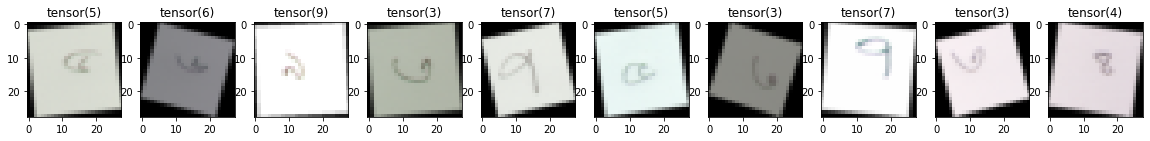

In [19]:
dataiter = iter(train_loader)
images, labels = dataiter.next() 
plt.subplots(figsize=(20, 32))
for i in range(10):
    plt.subplot(10/2, 10,i+1)
    img = images[i].detach().numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5]) 
    std = np.array([0.5, 0.5, 0.5])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.title(labels[i])
    # print(img.shape)
    plt.imshow(img)
plt.show()

In [20]:
class Net(nn.Module): # Module is library package
    
    def __init__(self):
        super().__init__()
        
        self.fc1=nn.Linear(3*28 * 28, 100)  #flatten the image 
        self.fc2=nn.Linear(100,100)
        self.fc3=nn.Linear(100,100)
        self.fc4=nn.Linear(100,100)  
        self.fc5=nn.Linear(100,100)
        self.fc6=nn.Linear(100,10)
        
    def forward(self,x): # pass the data
        
        x=f.relu(self.fc1(x))
        x=f.relu(self.fc2(x))
        x=f.relu(self.fc3(x))
        x=f.relu(self.fc4(x))
        x=f.relu(self.fc5(x))
        
        x=self.fc6(x)
        
        return x
               

net=Net()
print(net)

Net(
  (fc1): Linear(in_features=2352, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=100, bias=True)
  (fc5): Linear(in_features=100, out_features=100, bias=True)
  (fc6): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
#net.cuda()

In [21]:
optimizer =  optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
 
criterion = torch.nn.CrossEntropyLoss()

In [22]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [23]:
device

device(type='cpu')

In [24]:
Path='./net_final.pth'
traininglosses = []
trainingaccuracy = []
testinglosses = []
testaccuracy = []
totalsteps = []
epochs = 25
steps = 0
running_loss = 0
print_every = 4000

#epoch iteration
for epoch in range(epochs):
    accuracy = 0
    for inputs, labels in train_loader:
        net.train()
        steps += 1
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad() 
        
        logps = net.forward(inputs.view(-1,3*28*28))
        loss = criterion(logps, labels)
        loss.backward() 
        optimizer.step() 
 
        #Calculate traning accuracy
        pred = torch.argmax(logps, dim=1)
        correct = pred.eq(labels)
       
        running_loss += loss.item()
        accuracy += torch.mean(correct.float())
        
        if steps % print_every == 0:
            after_train_accuracy=accuracy/print_every
            test_loss = 0
            accuracy = 0
            net.eval()
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = net.forward(inputs.view(-1,3*28*28))
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    pred = torch.argmax(logps, dim=1)
                    correct = pred.eq(labels)
                    accuracy += torch.mean(correct.float())
            
            traininglosses.append(running_loss/print_every)
            trainingaccuracy.append(after_train_accuracy)
            testinglosses.append(test_loss/len(test_loader))
            testaccuracy.append(accuracy/len(test_loader))
            totalsteps.append(steps)
            print(f"Device {device} "
                  f"Epoch {epoch+1}/{epochs} "
                  f"Step {steps} "
                  f"Train loss: {running_loss/print_every:f} "
                  f"Train accuracy: {after_train_accuracy:f} "
                  f"Test loss: {test_loss/len(test_loader):f} "
                  f"Test accuracy: {accuracy/len(test_loader):f}")
            running_loss = 0
            accuracy = 0
            net.train()
print('Finish Train')
torch.save(net.state_dict(), Path)

Device cpu Epoch 6/25 Step 4000 Train loss: 2.283632 Train accuracy: 0.002788 Test loss: 2.262683 Test accuracy: 0.137500
Device cpu Epoch 11/25 Step 8000 Train loss: 2.184725 Train accuracy: 0.007350 Test loss: 2.172928 Test accuracy: 0.185000
Device cpu Epoch 16/25 Step 12000 Train loss: 2.103721 Train accuracy: 0.013587 Test loss: 2.087870 Test accuracy: 0.251250
Device cpu Epoch 21/25 Step 16000 Train loss: 1.940204 Train accuracy: 0.022900 Test loss: 1.854529 Test accuracy: 0.323500
Finish Train


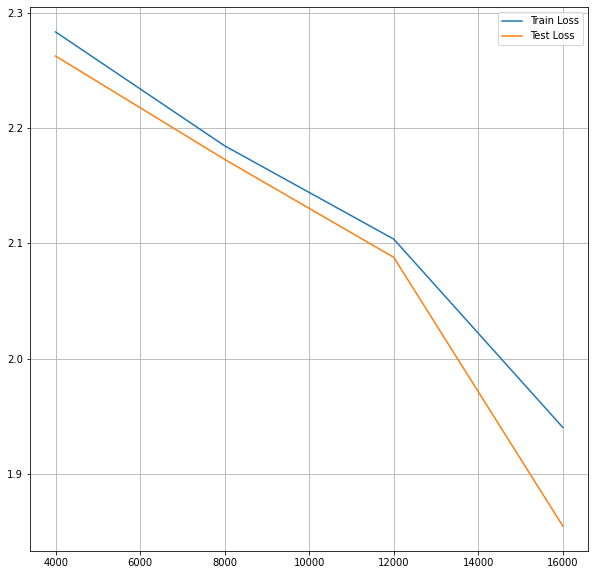

In [25]:
plt.figure(figsize=(10, 10))
plt.plot(totalsteps, traininglosses, label='Train Loss')
plt.plot(totalsteps, testinglosses, label='Test Loss')

plt.legend()
plt.grid()
plt.show()

In [26]:
correct=0
total=0
with torch.no_grad():
    for data in test_loader:
        X,y=data
        X, y = X.to(device), y.to(device)
        
        output=net(X.view(-1,3*28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1
            
print(round(correct/total,3))

0.387


In [27]:
correct

1549

In [28]:
nb_classes = 10

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(test_loader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = net.forward(inputs.view(-1,3*28*28))
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

tensor([[168.,  15.,  11., 137.,   5.,   3.,  14.,   7.,  28.,   1.],
        [ 43.,  60.,  17., 150.,  13.,   8.,  14.,  19.,  55.,   6.],
        [  8.,  47., 127.,  80.,  26.,  12.,   6.,  25.,  51.,   6.],
        [  7.,   7.,  10., 310.,  15.,   7.,  14.,  14.,   6.,   0.],
        [ 13.,  17.,  89.,  57., 180.,   8.,   3.,  17.,  29.,   2.],
        [ 12.,  16.,  11., 182.,   9.,  54.,  26.,  49.,  39.,   1.],
        [  4.,   0.,   0., 144.,   0.,  16., 202.,   8.,  19.,   0.],
        [  0.,   6.,  14., 121.,  10.,  26.,  11., 179.,  23.,   0.],
        [ 20.,  16.,  31.,  37.,  12.,   2.,  14.,  36., 257.,   2.],
        [ 38.,  48.,  20., 146.,  15.,  13.,  11.,  31.,  88.,  14.]])


Text(0.5, 15.0, 'Predicted label')

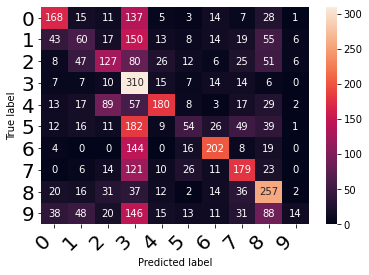

In [29]:
import pandas as pd
import seaborn as sns
class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=20)
plt.ylabel('True label')
plt.xlabel('Predicted label')